## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Feb 10 12:51:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [3]:
import os

# Define the base dataset directory
HOME = os.getcwd()
DATASET_BASE_PATH = HOME  # Base directory

# Select resolution
IMAGE_SIZE = 128  # Change this for different resolutions (16, 28, 128, 256)
DATASET_FOLDER_NAME = f"shapes_dataset_{IMAGE_SIZE}x{IMAGE_SIZE}"

# Define dataset paths dynamically based on selected size
DATASET_PATH = os.path.join(DATASET_BASE_PATH, DATASET_FOLDER_NAME, "dataset")
IMAGES_DIRECTORY_PATH = os.path.join(DATASET_PATH, "images")
ANNOTATIONS_FILE_PATH = os.path.join(DATASET_PATH, "annotations", "shapes_coco.json")

# Print paths for verification
print(f"✅ Using Dataset: {DATASET_FOLDER_NAME}")
print(f"✅ Images Path: {IMAGES_DIRECTORY_PATH}")
print(f"✅ Annotations Path: {ANNOTATIONS_FILE_PATH}")

✅ Using Dataset: shapes_dataset_128x128
✅ Images Path: /content/shapes_dataset_128x128/dataset/images
✅ Annotations Path: /content/shapes_dataset_128x128/dataset/annotations/shapes_coco.json


## Install Segment Anything Model (SAM) and other dependencies

In [23]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

  Preparing metadata (setup.py) ... done


In [24]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

### Download SAM weights

In [25]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [26]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/shapes/weights/sam_vit_h_4b8939.pth ; exist: True


## Download Example Data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [27]:
!mkdir -p {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg -P {HOME}/data

In [28]:
!git clone https://github.com/cjpurackal/shapes.git

Cloning into 'shapes'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 239 (delta 2), reused 0 (delta 0), pack-reused 228 (from 1)
Receiving objects: 100% (239/239), 250.39 KiB | 5.96 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [29]:
ls /content/shapes

data/  README.md         run.py   shapes_dataset_128x128/  shapes_dataset_256x256/  visualize.py
imgs/  requirements.txt  shapes/  shapes_dataset_16x16/    shapes_dataset_28x28/    weights/


In [30]:
cd shapes

/content/shapes/shapes


In [31]:
!python run.py --save_dir ./shapes_dataset_16x16 --image_size 16 16 --num_images 100 --shapes circle rect --task_type segmentation

!python run.py --save_dir ./shapes_dataset_28x28 --image_size 28 28 --num_images 100 --shapes circle rect --task_type segmentation

!python run.py --save_dir ./shapes_dataset_128x128 --image_size 128 128 --num_images 100 --shapes circle rect --task_type segmentation

!python run.py --save_dir ./shapes_dataset_256x256 --image_size 256 256 --num_images 100 --shapes circle rect --task_type segmentation

100% 100/100 [00:15<00:00,  6.34it/s]
Generated dataset in ./shapes_dataset_16x16
100% 100/100 [00:08<00:00, 11.88it/s]
Generated dataset in ./shapes_dataset_28x28
100% 100/100 [00:08<00:00, 11.40it/s]
Generated dataset in ./shapes_dataset_128x128
100% 100/100 [00:13<00:00,  7.35it/s]
Generated dataset in ./shapes_dataset_256x256


In [32]:
!mkdir -p shapes_dataset_16x16/dataset/images
!mv shapes_dataset_16x16/dataset/circle/* shapes_dataset_16x16/dataset/images/
!mv shapes_dataset_16x16/dataset/rect/* shapes_dataset_16x16/dataset/images/
!rm -rf shapes_dataset_16x16/dataset/circle
!rm -rf shapes_dataset_16x16/dataset/rect

!mkdir -p shapes_dataset_28x28/dataset/images
!mv shapes_dataset_28x28/dataset/circle/* shapes_dataset_28x28/dataset/images/
!mv shapes_dataset_28x28/dataset/rect/* shapes_dataset_28x28/dataset/images/
!rm -rf shapes_dataset_28x28/dataset/circle
!rm -rf shapes_dataset_28x28/dataset/rect

!mkdir -p shapes_dataset_128x128/dataset/images
!mv shapes_dataset_128x128/dataset/circle/* shapes_dataset_128x128/dataset/images/
!mv shapes_dataset_128x128/dataset/rect/* shapes_dataset_128x128/dataset/images/
!rm -rf shapes_dataset_128x128/dataset/circle
!rm -rf shapes_dataset_128x128/dataset/rect

!mkdir -p shapes_dataset_256x256/dataset/images
!mv shapes_dataset_256x256/dataset/circle/* shapes_dataset_256x256/dataset/images/
!mv shapes_dataset_256x256/dataset/rect/* shapes_dataset_256x256/dataset/images/
!rm -rf shapes_dataset_256x256/dataset/circle
!rm -rf shapes_dataset_256x256/dataset/rect

## Load Model

In [33]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [34]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

## Automated Mask Generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [35]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [36]:
import random

# Pick a random image from the selected dataset
IMAGE_NAME = random.choice(os.listdir(IMAGES_DIRECTORY_PATH))
IMAGE_PATH = os.path.join(IMAGES_DIRECTORY_PATH, IMAGE_NAME)

print(f"✅ Using Image: {IMAGE_PATH}")

✅ Using Image: /content/shapes/shapes_dataset_16x16/dataset/images/circle_65.png


### Generate masks with SAM

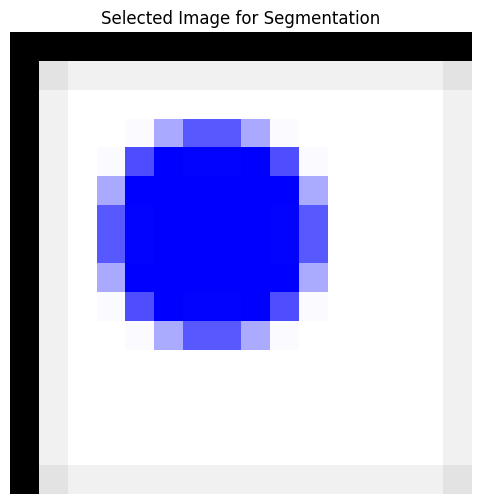

✅ Total detected masks: 51


In [37]:
import cv2
import supervision as sv
import matplotlib.pyplot as plt

# Load the selected image
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the selected image before segmentation
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Selected Image for Segmentation")
plt.axis("off")
plt.show()

# Generate segmentation masks
sam_result = mask_generator.generate(image_rgb)

print(f"✅ Total detected masks: {len(sam_result)}")

### Output format

`SamAutomaticMaskGenerator` returns a `list` of masks, where each mask is a `dict` containing various information about the mask:

* `segmentation` - `[np.ndarray]` - the mask with `(W, H)` shape, and `bool` type
* `area` - `[int]` - the area of the mask in pixels
* `bbox` - `[List[int]]` - the boundary box of the mask in `xywh` format
* `predicted_iou` - `[float]` - the model's own prediction for the quality of the mask
* `point_coords` - `[List[List[float]]]` - the sampled input point that generated this mask
* `stability_score` - `[float]` - an additional measure of mask quality
* `crop_box` - `List[int]` - the crop of the image used to generate this mask in `xywh` format

In [38]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


### Results visualisation with Supervision

As of version `0.5.0` Supervision has native support for SAM.

✅ Total detected masks: 51


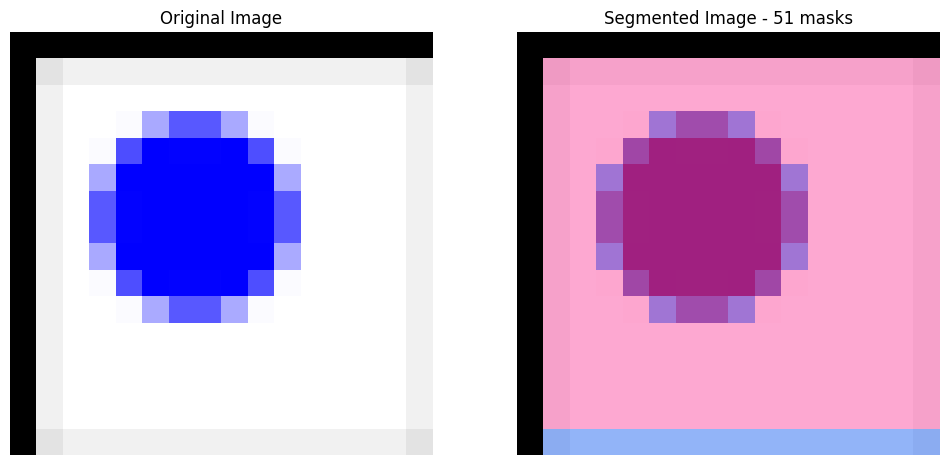

In [39]:
import supervision as sv
import matplotlib.pyplot as plt

print(f"✅ Total detected masks: {len(sam_result)}")

# Create a mask annotator
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Convert SAM output to supervision-compatible format
detections = sv.Detections.from_sam(sam_result=sam_result)  # Use all masks, no filtering

# Annotate the image with segmentation masks
annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

# Display original and segmented images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(annotated_image)
plt.title(f"Segmented Image - {len(sam_result)} masks")
plt.axis("off")

plt.show()


### Interaction with segmentation results

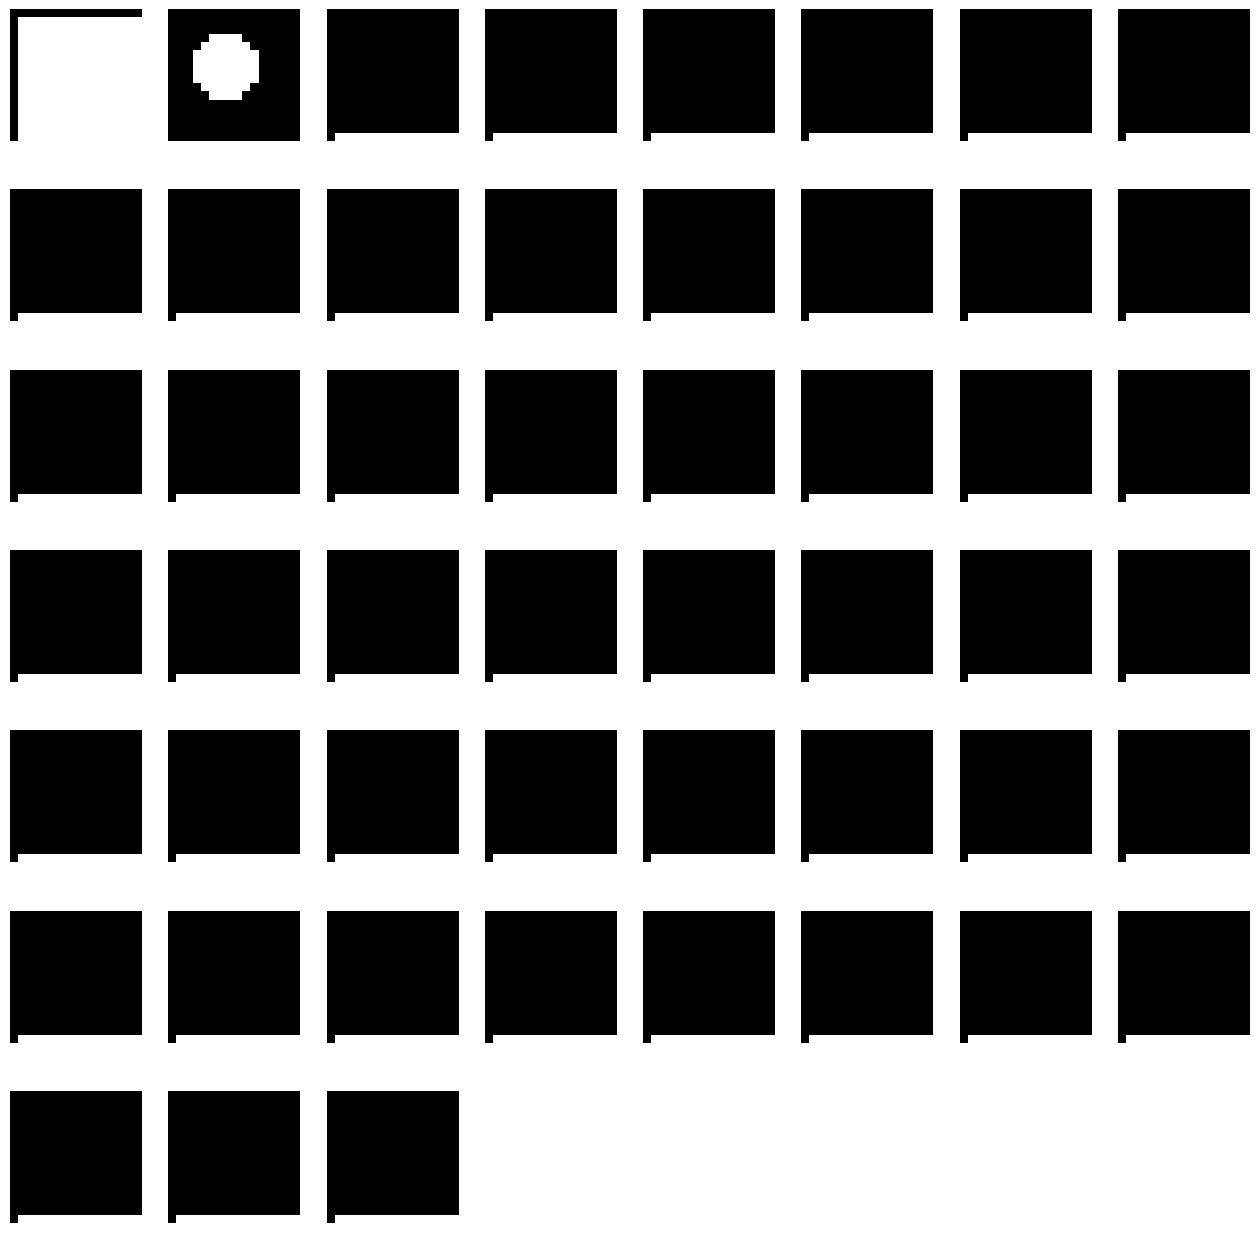

In [40]:
# Show all masks without filtering
masks = [mask['segmentation'] for mask in sam_result]

# Calculate grid size dynamically
num_masks = len(masks)
grid_cols = min(8, num_masks)  # Limit columns to a max of 8
grid_rows = (num_masks // grid_cols) + (num_masks % grid_cols > 0)  # Ensure all images fit

# Display masks in a properly sized grid
sv.plot_images_grid(
    images=masks,
    grid_size=(grid_rows, grid_cols),  # Auto-adjusted grid size
    size=(16, 16)
)

## Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

In [41]:
mask_predictor = SamPredictor(sam)

In [44]:
import os
import random

# Verify the images directory exists
if not os.path.exists(IMAGES_DIRECTORY_PATH):
    print(f"❌ ERROR: Images directory does not exist: {IMAGES_DIRECTORY_PATH}")
else:
    # Load image filenames
    IMAGES = os.listdir(IMAGES_DIRECTORY_PATH)

    if len(IMAGES) == 0:
        print("❌ ERROR: No images found in the dataset folder.")
    else:
        # Pick a random image
        IMAGE_NAME = random.choice(IMAGES)
        IMAGE_PATH = os.path.join(IMAGES_DIRECTORY_PATH, IMAGE_NAME)

        print(f"✅ Using Image: {IMAGE_PATH}")

✅ Using Image: /content/shapes/shapes_dataset_16x16/dataset/images/circle_51.png


### Draw Box



In [45]:
# helper function that loads an image before adding it to the widget

import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

**NOTE:** Execute cell below and use your mouse to draw bounding box on the image 👇

In [46]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [47]:
widget.bboxes

[]

### Generate masks with SAM

**NOTE:** `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format. Let's reorganise your data first

In [48]:
import numpy as np

# default_box is going to be used if you will not draw any box on image above
default_box = {'x': 68, 'y': 247, 'width': 555, 'height': 678, 'label': ''}

box = widget.bboxes[0] if widget.bboxes else default_box
box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])

In [49]:
import cv2
import numpy as np
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

### Results visualisation with Supervision

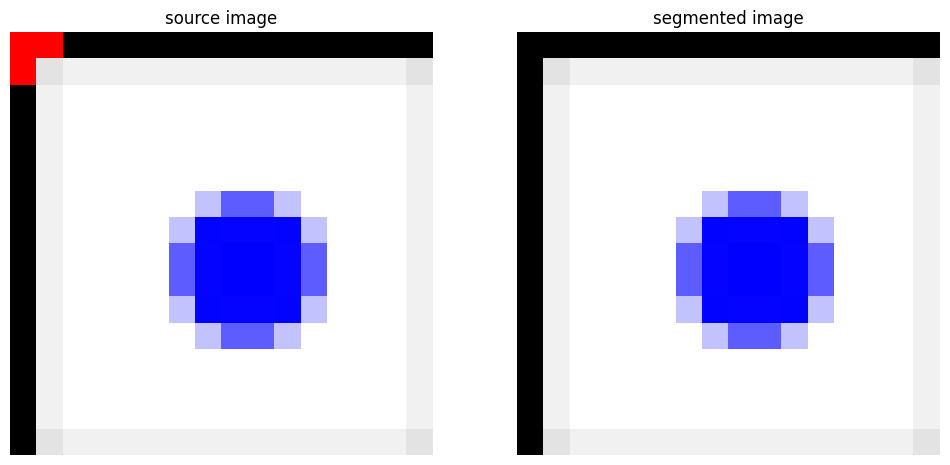

In [50]:
box_annotator = sv.BoxAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX)
mask_annotator = sv.MaskAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

### Interaction with segmentation results

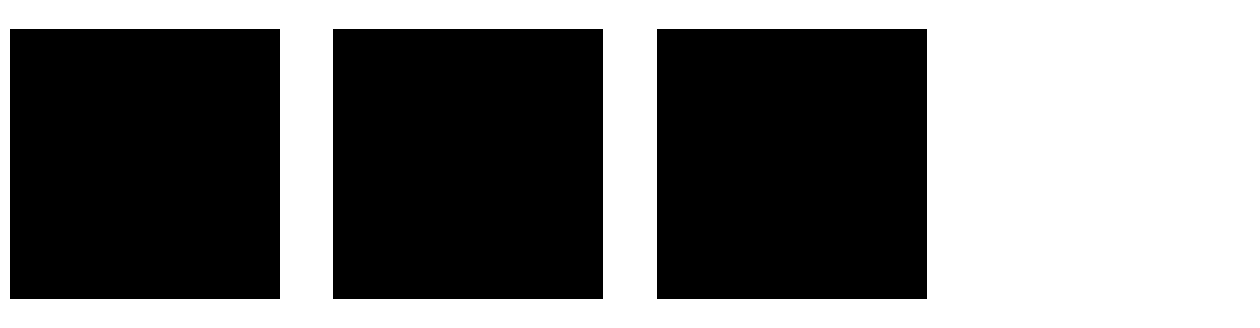

In [51]:
import supervision as v

sv.plot_images_grid(
    images=masks,
    grid_size=(1, 4),
    size=(16, 4)
)

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.